In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"
#os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"]="false"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import keras
import keras_hub
import jax.numpy as jnp

2025-05-23 09:47:34.333972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747993654.349535 3616879 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747993654.354235 3616879 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747993654.369517 3616879 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747993654.369531 3616879 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747993654.369532 3616879 computation_placer.cc:177] computation placer alr

# Session 07: Leveraging on existing models

While classical ML workflow goes from data to the generation of suitable models, it is becoming more and more frequent to **rely on existing models** as a starting point.
 - Models are becoming absolutely **huge** (up to trillions of parameters).
 - Most researchers/developers **don't have the resources** (data, computing power) to train this kind of models.

This session illustrates several approaches to rely on existing models, and the available tools for that.

## 1. Directly using third-party models: [🤗 HuggingFace](https://huggingface.co/)

HuggingFace is a company that provides open-source tools, models, and a platform for machine learning development:

 - **Open-Source Machine Learning Tools**: Wide range of open-source libraries and tools, such as Transformers, which facilitate the development and deployment of machine learning models, particularly in natural language processing (NLP).
 - **Model Hub**: Vast repository of pre-trained models across various domains, allowing users to easily download, fine-tune, and integrate state-of-the-art models into their applications.
 - **Community and Collaboration**: Community of developers and researchers, offering platforms for collaboration, knowledge sharing, and contributions to machine learning advancements.
 - **APIs and Integrations**: APIs and integrations for deploying models as scalable services, enabling seamless use in production environments across different platforms.

⚠️ __Unfortunately, a network issue prevents us from using HuggingFace from the server.__

### Alternatives: KerasHub, KaggleHub

There are other public and open-source hubs for reusing machine learning models. [Keras-hub](https://keras.io/keras_hub/) is probably the one that is more convenient to use with Keras, as all the models will follow the same API we have been working with so far.

As an example, let's load and execute **locally** a (legacy) LLM model from [Mistral](https://mistral.ai/). The model has been previously [downloaded](https://www.kaggle.com/models/keras/mistral/keras/mistral_instruct_7b_en/7) and extracted in a local path `/opt/tljh/common/mistral_instruct_7b_en`:

In [2]:
mistral_lm = keras_hub.models.MistralCausalLM.from_preset("/opt/tljh/common/mistral_instruct_7b_en", dtype="bfloat16")
mistral_lm.summary()

2025-05-23 09:47:55.647121: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1747993675.647565 3616879 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 27237 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:61:00.0, compute capability: 8.9
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "mistral_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mistral_tokenizer (MistralTokenizer)                          │                       Vocab size: 32,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "mistral_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mistral_backbone_1            │ (None, None, 4096)        │   7,241,732,096 │ padding_mask[0][0],        │
│ (MistralBackbone)             │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 32000)       │     262,144,000 │ mistral_backbone_1[0][0]   │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 7,241,732,096 (13.49 GB)

 Trainable params: 7,241,732,096 (13.49 GB)

 Non-trainable params: 0 (0.00 B)

The core of this model is another model (the `backbone`), that we may inspect in a little more detail:

In [3]:
mistral_lm.backbone.summary()

Model: "mistral_backbone_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ token_ids           │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_embedding     │ (None, None,      │ 262,144,0… │ token_ids[0][0]   │
│ (ReversibleEmbeddi… │ 32000)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ padding_mask        │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_0 │ (None, None,      │ 218,112,0… │ token_embedding[… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_1 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_2 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_3 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_4 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_5 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_6 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_7 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_8 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_9 │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_… │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_… │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_… │ (None, None,      │ 218,112,0… │ transformer_laye… │
│ (MistralTransforme… │ 4096)             │            │ padding_mask[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_layer_… │ (None, None,      │ 218,112,0… │ transformer_laye

 Total params: 7,241,732,096 (13.49 GB)

 Trainable params: 7,241,732,096 (13.49 GB)

 Non-trainable params: 0 (0.00 B)

We can use `generate` to generate text that follows a specific prompt:

In [5]:
print(mistral_lm.generate("Keras 3.0 is a", max_length=200))

Keras 3.0 is a powerful deep learning library that is built on top of the popular TensorFlow backend. The library provides an easy-to-use and intuitive interface for building deep learning models, and it includes many advanced features and tools for training, evaluating, and optimizing neural networks.

Some of the key features of Keras 3.0 include:

1. Sequential Model API: Keras 3.0 has a powerful and flexible Sequential Model API that allows users to easily build complex neural networks. The Sequential Model API provides a simple and consistent interface for specifying the layers, activations, and optimizers in a model, and it automatically handles the wiring and connections between them.
2. Model Layers: Keras includes a wide range of custom model layers, including Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), and many other


----

Or, since we have downloaded the `instruct` model, we can give it **direct instructions** with specific tokens `"[INST] - [/INST]"`. This would allow us to create a chatbot, for example:

In [4]:
print(mistral_lm.generate("[INST] Give me your best brownie recipe [/INST]", max_length=500))

[INST] Give me your best brownie recipe [/INST] Here is a recipe for chewy and fudgy brownies:

Ingredients:

* 1 cup (225g) unsalted butter, at room temperature
* 3/4 cup (170g) granulated sugar
* 1 1/2 cups (312g) packed light-brown sugar
* 2 teaspoons vanilla extract
* 4 large eggs
* 3/4 cup (170g) all-purpose flour
* 3/8 teaspoon baking powder
* 1/2 teaspoon baking soda
* 1/4 teaspoon salt
* 3/4 cup (170g) unsweetened cocoa powder
* 1 cup (225g) semisweet and/or milk chocolate chips

Instructions:

1. Preheat your oven to 350°F (180°C). Line a 9-inch (23cm) baking pan with parchment paper and grease it well with cooking spray or butter.
2. In a large bowl, cream the butter, brown sugar, and granulated sugar together using an electric mixer until light and fluffy. This will take about 3-4 minutes.
3. Add in the vanilla extract, eggs, and cocoa powder, and mix until well combined.
4. Add in the flour, baking powder, baking soda, and salt, and mix until the dry ingredients are fully i

----

However, we can see that all instructions are treated as independent, and that the model provides no *conversational memory*:

In [4]:
print(mistral_lm.generate("[INST] I don't have vanilla extract, please update the recipe with another ingredient [/INST]", max_length=500))

[INST] I don't have vanilla extract, please update the recipe with another ingredient [/INST] Sure! Here are some substitutions for vanilla extract that you can use in a recipe:
- 1 tablespoon of vanilla extract can be substituted with 1 teaspoon of vanilla powder or vanilla bean paste
- 1 tablespoon of vanilla extract can also be substituted with 1 teaspoon of almond extract or coconut extract
- If you want to make your own vanilla extract, you can steep 2 tablespoons of vanilla beans in 1 cup of vodka or whiskey for at least 4 weeks. Once it's ready, you can use it as a substitute for regular vanilla extract in equal amounts.


In [5]:
print(mistral_lm.generate("[INST] But please, put the full recipe again [/INST]", max_length=500))

[INST] But please, put the full recipe again [/INST] Sure! Here's the recipe for a classic Caesar salad with garlic croutons:

Garlic Croutons:

* 1 baguette, sliced into 1-inch pieces
* 3 cloves garlic, minced
* 3 tablespoons olive oil
* 1 teaspoon salt
* 1/2 teaspoon black pepper

Caesar Salad:

* 1 baguette, sliced into 1-inch pieces
* 3 cloves garlic, minced
* 3 tablespoons olive oil
* 1 teaspoon salt
* 1/2 teaspoon black pepper
* 1 cup chopped romaine lettuce
* 1/2 cup chopped parsley
* 1/2 cup shaved parmesan cheese
* 1 cup croutons
* 1/2 cup mayonnaise
* 2 tablespoons Dijon mustard
* 2 egg yolks
* 1 tablespoon lemon juice
* 1 teaspoon Worcestershire sauce
* 1/2 teaspoon salt
* 1/4 teaspoon black pepper

To make the garlic croutons, preheat the oven to 375°F. In a bowl, toss the sliced baguette with minced garlic, olive oil, salt, and pepper until the bread is evenly coated. Spread the bread out in a single layer on a baking sheet and bake for 8-10 minutes, or until the bread is 

----
### Using individual components from large models

We may also directly use some components of the trained model, such as the `Tokenizer` to convert strings to arrays of numbers:

In [6]:
tokenizer = keras_hub.models.MistralTokenizer.from_preset("/opt/tljh/common/mistral_instruct_7b_en")
print(tokenizer("The quick brown fox jumped."))

# Batched input.
print(tokenizer(["The quick brown fox jumped.", "The fox slept."]))

# Detokenization.
tokenizer.detokenize(tokenizer("The quick brown fox jumped."))

[  415  2936  9060   285  1142 14949 28723]
[[415, 2936, 9060, 285, 1142, 14949, 28723], [415, 285, 1142, 18283, 28723]]


'The quick brown fox jumped.'

Another, more interesting use case is exploiting the `Embeddings` of the model:
 - Embeddings can be seen as functions that **convert a token to a vector in a high-dimensional space**.
 - This high-dimensional space preserves the **semantic meaning** the model gives to each token.
 - Extremely useful for many natural language processing tasks (classification, sentiment analysis, etc.)

For this, we need to directly use the backbone:

In [7]:
backbone = mistral_lm.backbone

In [8]:
#We define three different sentences, and compare the embeddings making a 
#ranking of pairs of words with embeddings similarity.
from optax.losses import cosine_similarity
sentences = ["The quick brown fox jumped and got tired", 
             "My dog ran through the yard until feeling exhausted", 
             "I don't want to be aware of your love feelings"]
tokenizations = [tokenizer(s) for s in sentences]
embeddings = [backbone.token_embedding(tk) for tk in tokenizations]
similarities = {}
for i in range(len(sentences)):
    for j in range(len(tokenizations[i])):
        ref = embeddings[i][j]
        for k in range(i+1, len(sentences)):            
            for n in range(len(tokenizations[k])):
                similarities[(tokenizer.detokenize([tokenizations[i][j]]), 
                              tokenizer.detokenize([tokenizations[k][n]]))] = cosine_similarity(ref, embeddings[k][n])
sorted_similarities = dict(sorted(similarities.items(), key=lambda item: item[1], reverse=True))
display(list(sorted_similarities.items())[:15])

[(('The', 'the'), Array(0.363281, dtype=bfloat16)),
 (('feeling', 'feelings'), Array(0.322266, dtype=bfloat16)),
 (('tired', 'exhausted'), Array(0.273438, dtype=bfloat16)),
 (('My', 'your'), Array(0.255859, dtype=bfloat16)),
 (('and', 'to'), Array(0.238281, dtype=bfloat16)),
 (('The', 'My'), Array(0.209961, dtype=bfloat16)),
 (('the', 'your'), Array(0.201172, dtype=bfloat16)),
 (('My', 'I'), Array(0.198242, dtype=bfloat16)),
 (('and', 'of'), Array(0.177734, dtype=bfloat16)),
 (('got', 'want'), Array(0.15625, dtype=bfloat16)),
 (('through', 'to'), Array(0.15625, dtype=bfloat16)),
 (('got', 'ran'), Array(0.137695, dtype=bfloat16)),
 (('through', 'of'), Array(0.128906, dtype=bfloat16)),
 (('jumped', 'ran'), Array(0.125977, dtype=bfloat16)),
 (('until', 'to'), Array(0.114746, dtype=bfloat16))]

We may also measure the similarity between sentences as the average similarity between tokens:

In [9]:
similarities = {}
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        #Distances between sentences i and j
        dists = []
        for k in range(len(tokenizations[i])):
            for n in range(len(tokenizations[j])):
                dists.append(cosine_similarity(embeddings[i][k], embeddings[j][n]))
        similarities[(i,j)] = jnp.mean(jnp.array(dists))
similarities

{(0, 1): Array(0.0424805, dtype=bfloat16),
 (0, 2): Array(0.0361328, dtype=bfloat16),
 (1, 2): Array(0.0388184, dtype=bfloat16)}

Before moving on to simpler tasks, let's restart the kernel to free GPU memory and resources:

In [ ]:
#Restart the kernel
import os
os._exit(00)

In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"
#os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"]="false"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

## 2. Transfer learning and fine-tuning

Transfer learning consists of **taking features learned on one problem, and leveraging them on a new, similar problem**.
 - Usually helps in tasks where your dataset has too little data to train a full-scale model from scratch.

Conceptually, transfer learning involves:

 1. Take layers from a previously trained model.
 2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
 3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
 4. Train the new layers on your dataset.

<img width="60%" src="https://www.researchgate.net/publication/354803048/figure/fig5/AS:1117058628620290@1643338939664/Representation-of-transfer-learning-between-two-neural-network-models_W640.jpg" style="margin:auto"/>

A last, optional step, is **fine-tuning**, which consists of unfreezing the entire model you obtained above and **re-training** it on the new data **with a very low learning rate**. This can potentially achieve meaningful improvements, by incrementally adapting the pretrained features to the new data.

The **key functionality** for transfer learning & fine-tuning in Keras is the `trainable` API:
 - `Layers` and `Models` have a `trainable` boolean attribute that can be changed programmatically.
 - Setting `layer.trainable` to `False` moves all the layer's weights from trainable to non-trainable. This is called "freezing" the layer.

### The typical transfer-learning workflow in Keras

#### 1. Instantiate a base model and load pre-trained weights into it.

```python
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(72, 72, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
```

#### 2. Freeze all layers in the base model by setting `trainable = False`.


```python
base_model.trainable = False
```

#### 3. Create a new model on top of the output of one (or several) layers from the base model.

```python
inputs = keras.Input(shape=(72, 72, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
```

#### 4. Train your new model on your new dataset.

```python
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(new_dataset, epochs=5, callbacks=..., validation_data=...)
```

📌 __Example__: Based on an [Xception](https://keras.io/api/applications/xception/) network pre-trained on the ImageNet dataset, train a new one that learns how to distinguish cats from dogs on the CIFAR10 dataset.

 - First, we need to make sure that the target data fits the requirements of the base model. Checking the documentation of Xception, we see that:
     - It assumes an image size of 299x299 pixels. This size can be modified, but cannot be smaller than 71x71.
     - Each pixel has a value between -1 and +1 for each channel.

Since CIFAR10 is composed of 32x32 images, with each pixel in range [0-255], we need some preprocessing. Also, we have to remove all other classes apart from "cats" and "dogs":


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#Cat is class 3, and dogs class 5 in the original dataset
idx_train = np.where(np.logical_or(y_train==3,y_train==5))[0]
idx_test = np.where(np.logical_or(y_test==3,y_test==5))[0]
x_train, y_train = x_train[idx_train], y_train[idx_train]
x_test, y_test = x_test[idx_test], y_test[idx_test]
#Convert labels to 0-1 (dogs-cats)
y_train = (y_train==3).astype(int)
y_test = (y_test==3).astype(int)
#Set fixed image size (72x72) and pixel range to [-1, 1]
resize = keras.layers.Resizing(72, 72, data_format='channels_last')
rescale = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x_train = resize(rescale(x_train))
x_test = resize(rescale(x_test))
print(x_train.shape)

(10000, 72, 72, 3)


Now let's built a model that follows the blueprint we've explained earlier.

👉 __Note that__:
 - We make sure to pass `training=False` when calling the base model, so that it runs in inference mode, so that batchnorm statistics don't get updated even after we unfreeze the base model for fine-tuning.

In [3]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(72, 72, 3),
    include_top=False) # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(72, 72, 3))

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.summary(show_trainable=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 72, 72, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ xception (Functional)       │ (None, 3, 3, 2048)    │ 20,861,480 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d    │ (None, 2048)          │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 2048)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 1)             │      2,049 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 - Training of the top layer (the classifier for the new classes).

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()])

print("Fitting the top layer of the model")
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

print("Test dataset evaluation after Transfer Learning")
y_pred = model.predict(x_test)>0.5
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
display(cm_df)
display(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().round(2))

Fitting the top layer of the model
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - binary_accuracy: 0.6971 - loss: 0.5721 - val_binary_accuracy: 0.7815 - val_loss: 0.4563
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.8010 - loss: 0.4301 - val_binary_accuracy: 0.7920 - val_loss: 0.4386
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8056 - loss: 0.4133 - val_binary_accuracy: 0.7965 - val_loss: 0.4391
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8050 - loss: 0.4102 - val_binary_accuracy: 0.8020 - val_loss: 0.4457
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8112 - loss: 0.4024 - val_binary_accuracy: 0.7910 - val_loss: 0.4408
Test dataset evaluation after Transfer Learning
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


,Pred 0,Pred 1
True 0,812,188
True 1,201,799


,precision,recall,f1-score,support
0,0.80,0.81,0.81,1000.00
1,0.81,0.80,0.80,1000.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.81,0.81,0.81,2000.00
weighted avg,0.81,0.81,0.81,2000.00


In [5]:
#We save the model weights after transfer learning, in case we want to try
#different rounds of fine-tuning.
tl_weights = model.get_weights()

### Fine-tuning

Once our model has converged on the new data, we can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate.

This is an optional last step that can potentially give you incremental improvements. It could also **potentially lead to quick overfitting** -- keep that in mind.

It is critical to only do this step *after* the model with frozen layers has been trained to convergence:
 - Mixing randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training.
 - This will destroy the pre-trained features.

It's also critical to use a very low learning rate at this stage, because we are training a much larger model than in the first round of training, on a dataset that is typically small.

As a result, we are at risk of overfitting very quickly if applying large weight updates. We only pursue **incremental adaption**

This is how to implement fine-tuning of the whole base model:

```python
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile the model after changing the the `trainable`
# attribute of any inner layer, otherwise changes get ignored.
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

# Train end-to-end. Be careful to stop before overfitting!
model.fit(new_xtrain, new_ytrain, epochs=10, callbacks=..., validation_split=...)
```

**Important note about `compile()` and `trainable`**

Calling `compile()` on a model is meant to "freeze" the behavior of that model.
 - The `trainable` attribute values at the time the model is compiled should be preserved throughout the lifetime of that model, until `compile` is called again.
 - If you change any `trainable` value, make sure to call `compile()` again!

#### 📋 Exercise 1

Based on these instructions:
 - Complete the code below to implement fine-tuning on the model we just did transfer learning.
 - Play with different learning rates and number of epochs to see the overfitting effect.

In [6]:
# First, we restore the weights after transfer learning, so different fine-tuning rounds
# don't affect each other.
model.set_weights(tl_weights)
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when creating it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary(show_trainable=True)

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

print("Fitting the end-to-end model")
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 72, 72, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ xception (Functional)       │ (None, 3, 3, 2048)    │ 20,861,480 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d    │ (None, 2048)          │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 2048)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 1)             │      2,049 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 20,867,629 (79.60 MB)

 Trainable params: 20,809,001 (79.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 4,100 (16.02 KB)

Fitting the end-to-end model
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - binary_accuracy: 0.6876 - loss: 0.5959 - val_binary_accuracy: 0.7725 - val_loss: 0.5030
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - binary_accuracy: 0.8032 - loss: 0.4529 - val_binary_accuracy: 0.7975 - val_loss: 0.4320
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - binary_accuracy: 0.8507 - loss: 0.3554 - val_binary_accuracy: 0.8150 - val_loss: 0.4032
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - binary_accuracy: 0.8720 - loss: 0.2905 - val_binary_accuracy: 0.8260 - val_loss: 0.3919
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - binary_accuracy: 0.8935 - loss: 0.2458 - val_binary_accuracy: 0.8375 - val_loss: 0.3821
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - binary_accuracy: 0.9087 - loss: 0.2046 - val_binary_accuracy: 0.8420 - val_loss: 0.3808
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - binary_accuracy: 0.9306 - loss: 0.1705 - val_binary_accu

Finally, we evaluate the fine-tuned model and assess the potential improvement.

In [7]:
print("Test dataset evaluation after fine-tuning")
y_pred = model.predict(x_test)>0.5
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
display(cm_df)
display(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().round(2))

Test dataset evaluation after fine-tuning
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


,Pred 0,Pred 1
True 0,843,157
True 1,124,876


,precision,recall,f1-score,support
0,0.87,0.84,0.86,1000.00
1,0.85,0.88,0.86,1000.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.86,0.86,0.86,2000.00
weighted avg,0.86,0.86,0.86,2000.00


## 3. Knowledge distillation

Knowledge distillation is a technique for training a model solving the same task as another model, but:
 - The new model should be significantly smaller.
 - It may use less input data, or simplified data (e.g. fewer channels, lower resolution, etc.).

These two models are known as *Teacher* and *Student*. The objective is to **extract explicit knowledge from the teacher** and inject it to the student.

<img width="80%" src="https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Knowledge-Distillation_1.png" style="margin:auto"/>

----

The most typical approach to knowledge distillation for classification is through the use of **soft labels**:
 - Classical (hard) labels are **the same for all samples** from the same class. No matter how different or similar they really are from other classes.
 - Soft labels give a **probability to each class**, explicitly stating how "far" or "close" each sample is from other classes.
 - Usually, **soft labels cannot be provided by experts**. Too expensive and prone to inconsistencies.

<img width="80%" src="assets/soft_labels.png" style="margin:auto"/>

----

However, this poses some **challenges on data management**:
 - Reliable soft labels come from the *testing set* of the Teacher model.
 - Thus, the Teacher and the Student **should not use the same training data**.

#### 💡 Open discussion:

How can we use a dataset for training a teacher and a student model while maximizing the number of available samples for each of them?

### 📌 Creating a reduced model for CIFAR10

We will illustrate the use of knowledge distillation with the CIFAR10 dataset (32x32 color images from 10 classes).
 - The objective is to develop a tiny classifier, with very few parameters.
 - Also, the classifier will work with even smaller images (16x16), to add an aditional level of efficiency.

The first step is to load the dataset and prepare the data for training the teacher and the student.

In [8]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
#For the student model, we create a reduced version of the images (just 16x16px)
resize = keras.layers.Resizing(16, 16, data_format='channels_last')
x_train_st = resize(x_train)
x_test_st = resize(x_test)

In [9]:
# Model parameters
num_classes = len(np.unique(y_train))
input_shape_teacher = x_train[0].shape

def get_teacher_model():
    return keras.Sequential(
            [
                keras.layers.Input(shape=input_shape_teacher),
                keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                keras.layers.MaxPooling2D(pool_size=(2, 2)),
                keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
                keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
                keras.layers.GlobalAveragePooling2D(),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(num_classes, activation="softmax"),
            ], name="Teacher")

get_teacher_model().summary()

Model: "Teacher"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,450 (1021.29 KB)

 Trainable params: 261,450 (1021.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
input_shape_student = x_train_st[0].shape

def get_student_model():
    return keras.Sequential(
        [
            keras.layers.Input(shape=input_shape_student),        
            keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(num_classes, activation="softmax"),
        ], name="Student")
    
get_student_model().summary()

Model: "Student"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,442 (9.54 KB)

 Trainable params: 2,442 (9.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Independent training/evaluation of both models
teacher_model = get_teacher_model()
teacher_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])
history_teacher = teacher_model.fit(x_train, y_train, batch_size=128, 
                                    epochs=20, validation_split=0.15)
teacher_model.evaluate(x_test, y_test)

Epoch 1/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.2194 - loss: 2.0233 - val_accuracy: 0.3992 - val_loss: 1.6039
Epoch 2/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3797 - loss: 1.6530 - val_accuracy: 0.3959 - val_loss: 1.7372
Epoch 3/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4414 - loss: 1.5333 - val_accuracy: 0.5217 - val_loss: 1.3542
Epoch 4/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4837 - loss: 1.4140 - val_accuracy: 0.5337 - val_loss: 1.2924
Epoch 5/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5167 - loss: 1.3432 - val_accuracy: 0.5551 - val_loss: 1.2030
Epoch 6/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5408 - loss: 1.2747 - val_accuracy: 0.4983 - val_loss: 1.3800
Epoch 7/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5399 - loss: 1.2916 - val_accuracy: 0.5908 - val_loss: 1.1504
Epoch 8/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5724 - loss: 1.1911 - val_accuracy: 0

[0.8060051202774048, 0.7116000056266785]

In [12]:
#Independent training/evaluation of both models
student_model = get_student_model()
student_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])
history_student = student_model.fit(x_train_st, y_train, batch_size=128, 
                                    epochs=30, validation_split=0.15)
student_model.evaluate(x_test_st, y_test)

Epoch 1/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1295 - loss: 2.2721 - val_accuracy: 0.2233 - val_loss: 2.1479
Epoch 2/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1943 - loss: 2.1396 - val_accuracy: 0.2484 - val_loss: 2.0784
Epoch 3/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2158 - loss: 2.0844 - val_accuracy: 0.2403 - val_loss: 2.0404
Epoch 4/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2256 - loss: 2.0498 - val_accuracy: 0.2673 - val_loss: 1.9962
Epoch 5/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 2.0228 - val_accuracy: 0.2688 - val_loss: 1.9732
Epoch 6/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2570 - loss: 2.0018 - val_accuracy: 0.2899 - val_loss: 1.9495
Epoch 7/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2665 - loss: 1.9781 - val_accuracy: 0.3115 - val_loss: 1.9220
Epoch 8/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2674 - loss: 1.9638 - val_accuracy: 0

[1.8011714220046997, 0.34940001368522644]

If we have the opportunity to train both the teacher and student models, it is possible to **not sacrifice** part of the training data in knowledge distillation **using cross-validation**.

 - We train as many teacher models as cross-validation folds, and each of them generates the soft labels for part of the training set (the ones corresponding to the fold test set).

<img width="60%" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" style="margin:auto" />

#### 📋 Exercise 2

 - Using k-fold cross-validation, generate soft labels for the full training set.
 - Visualize the distribution of the soft labels, to check how they indeed encode some uncertainty in the classification.

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [14]:
#Complete the code to solve exercise 2
nfolds = 5
kfold = KFold(nfolds, shuffle=True)
soft_labels = np.zeros_like(teacher_model.predict(x_train))
for i, (train_index, test_index) in tqdm(enumerate(kfold.split(x_train)), total=nfolds):
    fold_x_train, fold_y_train = x_train[train_index], y_train[train_index]
    fold_x_test, fold_y_test = x_train[test_index], y_train[test_index]
    #We train a new teacher model for each fold
    teacher = get_teacher_model()
    teacher.compile(optimizer='adam',
                    loss=keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])
    teacher.fit(fold_x_train, fold_y_train, batch_size=128, epochs=20, verbose=0)
    soft_labels[test_index] = teacher.predict(fold_x_test)
    print(teacher.evaluate(fold_x_test, fold_y_test))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step


  0%|          | 0/5 [00:00<?, ?it/s]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step    
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7335 - loss: 0.7901


 20%|██        | 1/5 [00:19<01:18, 19.74s/it]

[0.7938253879547119, 0.729900062084198]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step    
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7077 - loss: 0.8506


 40%|████      | 2/5 [00:39<00:58, 19.50s/it]

[0.8429996371269226, 0.7101000547409058]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7194 - loss: 0.8216


 60%|██████    | 3/5 [00:58<00:39, 19.51s/it]

[0.8166283369064331, 0.7153000235557556]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7115 - loss: 0.8301


 80%|████████  | 4/5 [01:18<00:19, 19.72s/it]

[0.83193039894104, 0.7161000370979309]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7222 - loss: 0.8111


100%|██████████| 5/5 [01:38<00:00, 19.64s/it]

[0.80824214220047, 0.7205000519752502]


<Axes: ylabel='Density'>

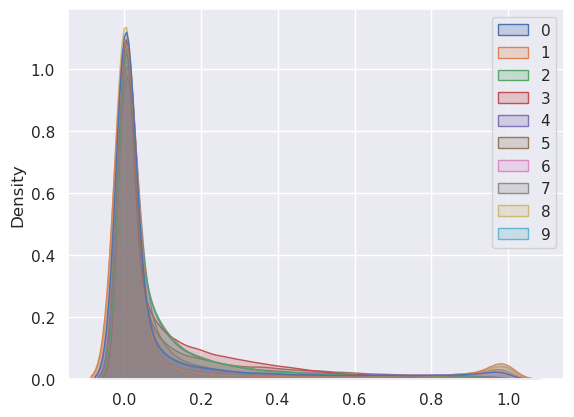

In [15]:
import seaborn as sns
sns.set_theme()
sns.kdeplot(soft_labels, fill=True)

----

Now that we have the soft labels for the whole training set, we train a new student model with these labels and assess the training performance compared with the original student.
 - 👉 Note that we use `CategoricalCrossentropy` as a loss, rather than `SparseCategoricalCrossEntropy`. The reason is that now the labels are probabilities, not integers.


In [16]:
student_distilled = get_student_model()
student_distilled.compile(optimizer='adam',
                          loss=keras.losses.CategoricalCrossentropy(),
                          metrics=['accuracy'])
history_distilled = student_distilled.fit(x_train_st, soft_labels, batch_size=128, 
                                          epochs=30, validation_split=0.15)

Epoch 1/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1405 - loss: 2.2700 - val_accuracy: 0.2239 - val_loss: 2.1278
Epoch 2/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2152 - loss: 2.1261 - val_accuracy: 0.2804 - val_loss: 2.0586
Epoch 3/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2403 - loss: 2.0697 - val_accuracy: 0.3067 - val_loss: 2.0067
Epoch 4/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2735 - loss: 2.0222 - val_accuracy: 0.3156 - val_loss: 1.9711
Epoch 5/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2864 - loss: 1.9896 - val_accuracy: 0.3341 - val_loss: 1.9376
Epoch 6/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.9735 - val_accuracy: 0.3489 - val_loss: 1.9135
Epoch 7/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3047 - loss: 1.9520 - val_accuracy: 0.3511 - val_loss: 1.8993
Epoch 8/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3110 - loss: 1.9369 - val_accuracy: 0

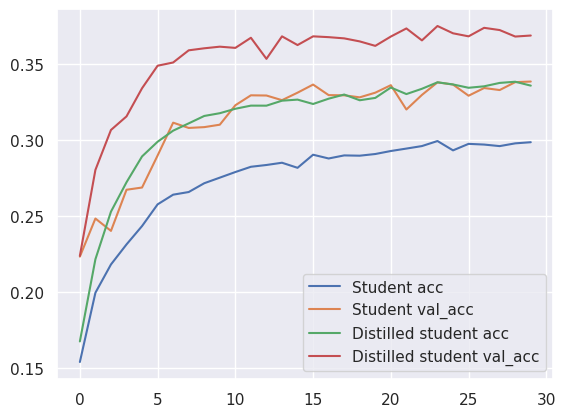

In [17]:
plt.plot(history_student.history['accuracy'], label='Student acc')
plt.plot(history_student.history['val_accuracy'], label='Student val_acc')
plt.plot(history_distilled.history['accuracy'], label='Distilled student acc')
plt.plot(history_distilled.history['val_accuracy'], label='Distilled student val_acc')
plt.legend()

### Increasing the uncertainty of teacher labels: Temperature

A non-expected issue when applying knowledge distillation is if the **Teacher model is too good**, so that is highly *convinced* of the value of each label.
 - In these cases, soft labels are very similar to hard labels.
 - This makes impossible to extract any valuable knowledge from them.

A strategy to address this kind of issue is by the use of a *Temperature* parameter that softens the probability distributions at the output. This is achieved by **reducing the magnitude** of the outputs before the activation function (e.g. [`sigmoid`](https://en.wikipedia.org/wiki/Logistic_function) or `softmax`).

Mathematically, given a *logits* vector ($\mathbf{z} = (z_1, z_2, \ldots, z_n)$) and a temperature parameter ($T$), the temperature-scaled softmax activation is defined as:

$$
\text{softmax}_T(z_i) = \frac{e^{z_i / T}}{\sum_{j} e^{z_j / T}}
$$

This can be easily implemented by just adding a `Lambda` layer to perform the division before applying the `Softmax` activation.

----

📌 Let's see an example using the Fashion MNIST dataset:

In [18]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
#Expand dimensions for compatibility with Convolutional layers
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]
#For the student model, we create a reduced version of the images (just 14x14px)
resize = keras.layers.Resizing(14, 14, data_format='channels_last')
x_train_st = resize(x_train)
x_test_st = resize(x_test)

In [19]:
num_classes = len(np.unique(y_train))
#Temperature parameter for additional softening of the soft labels
T = 1.
input_shape_teacher = x_train[0].shape
input_shape_student = x_train_st[0].shape

def get_teacher_model():
    return keras.Sequential(
            [
                keras.layers.Input(shape=input_shape_teacher),
                keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                keras.layers.MaxPooling2D(pool_size=(2, 2)),
                keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
                keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
                keras.layers.GlobalAveragePooling2D(),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(num_classes),
                #Apply the temperature parameter
                keras.layers.Lambda(lambda x:x/T),
                keras.layers.Softmax()
            ], name="Teacher")

def get_student_model():
    return keras.Sequential(
        [
            keras.layers.Input(shape=input_shape_student),        
            keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(num_classes, activation="softmax"),
        ], name="Student")

In [20]:
#General evaluation of the teacher model.
teacher_model = get_teacher_model()
teacher_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])
history_teacher = teacher_model.fit(x_train, y_train, batch_size=128, 
                                    epochs=20, validation_split=0.15, verbose=0)
teacher_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9079 - loss: 0.2610


[0.259818434715271, 0.9062000513076782]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step


  0%|          | 0/5 [00:00<?, ?it/s]

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step  
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.3142


 20%|██        | 1/5 [00:10<00:43, 10.94s/it]

[0.3145979642868042, 0.8866666555404663]
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8893 - loss: 0.2961


 40%|████      | 2/5 [00:22<00:33, 11.07s/it]

[0.29849380254745483, 0.8887500166893005]
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8892 - loss: 0.2925


 60%|██████    | 3/5 [00:33<00:22, 11.07s/it]

[0.29575011134147644, 0.890666663646698]
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step  
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8940 - loss: 0.2891


 80%|████████  | 4/5 [00:44<00:11, 11.36s/it]

[0.2858119606971741, 0.8976666331291199]
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step  
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.2932


100%|██████████| 5/5 [00:56<00:00, 11.23s/it]

[0.29728439450263977, 0.893833339214325]


<Axes: ylabel='Density'>

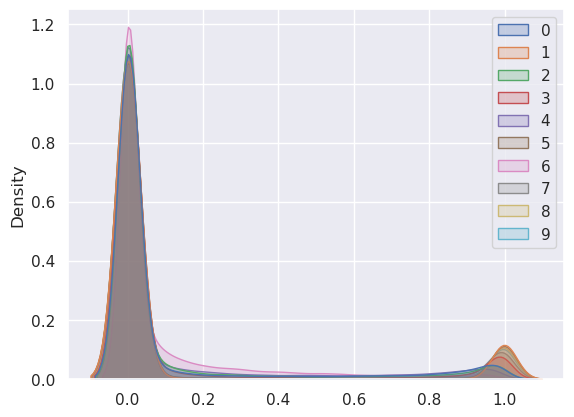

In [21]:
#Creation of the soft labels
nfolds = 5
kfold = KFold(nfolds, shuffle=True)
soft_labels = np.zeros_like(teacher_model.predict(x_train))
for i, (train_index, test_index) in tqdm(enumerate(kfold.split(x_train)), total=nfolds):
    fold_x_train, fold_y_train = x_train[train_index], y_train[train_index]
    fold_x_test, fold_y_test = x_train[test_index], y_train[test_index]
    #We train a new teacher model for each fold
    teacher = get_teacher_model()
    teacher.compile(optimizer='adam',
                    loss=keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])
    teacher.fit(fold_x_train, fold_y_train, batch_size=128, epochs=10, verbose=0)
    soft_labels[test_index] = teacher.predict(fold_x_test)
    print(teacher.evaluate(fold_x_test, fold_y_test))
#Visualization of soft labels distributions
sns.kdeplot(soft_labels, fill=True)

In [22]:
#Training of non-distilled and distilled student models
student_model = get_student_model()
student_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])
history_student = student_model.fit(x_train_st, y_train, batch_size=128, 
                                    epochs=30, validation_split=0.15, verbose=0)

student_distilled = get_student_model()
student_distilled.compile(optimizer='adam',
                          loss=keras.losses.CategoricalCrossentropy(),
                          metrics=['accuracy'])
history_distilled = student_distilled.fit(x_train_st, soft_labels, batch_size=128, 
                                          epochs=30, validation_split=0.15, verbose=0)

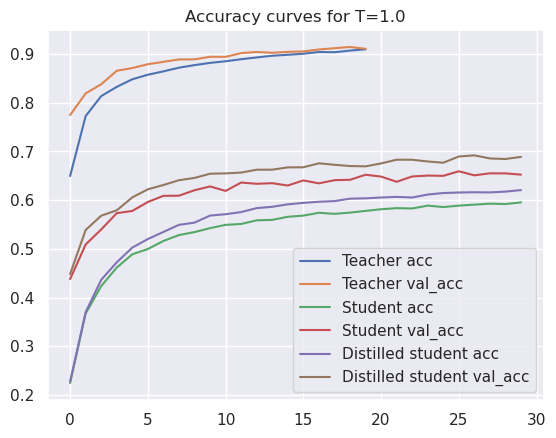

In [23]:
plt.plot(history_teacher.history['accuracy'], label='Teacher acc')
plt.plot(history_teacher.history['val_accuracy'], label='Teacher val_acc')
plt.plot(history_student.history['accuracy'], label='Student acc')
plt.plot(history_student.history['val_accuracy'], label='Student val_acc')
plt.plot(history_distilled.history['accuracy'], label='Distilled student acc')
plt.plot(history_distilled.history['val_accuracy'], label='Distilled student val_acc')
plt.title(f'Accuracy curves for T={T}')
plt.legend()

#### 📋 Exercise 3

 - Play with different values of the `T` parameter (e.g. in the range [1-1000000]) to see its influence on the distribution of the soft labels and on the learning performance of the student model.
 - Also, switch to the MNIST dataset (that saturates earlier than Fashion MNIST to high accuracy) and compare the behavior.

# References
 - HuggingFace: https://huggingface.co/
 - Keras guide on Transfer learning & Fine-tuning: https://keras.io/guides/transfer_learning/
 - Knowledge distillation tutorial: https://docs.pytorch.org/tutorials/beginner/knowledge_distillation_tutorial.html